# TensorFlow 中的深度神经网络
你已经学过了如何用 TensorFlow 构建一个逻辑分类器。现在你会学到如何用逻辑分类器来构建一个深度神经网络。

## 详细指导
接下来我们看看如何用 TensorFlow 来构建一个分类器来对 MNIST 数字进行分类。如果你要在自己电脑上跑这个代码，[文件](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/DLND+documents/multilayer-perceptron.zip)在这儿。你可以在[Aymeric Damien 的 GitHub repository](https://github.com/aymericdamien/TensorFlow-Examples)里找到更多的 TensorFlow 的例子。

## 代码
### TensorFlow MNIST
```
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)
```
你可以使用 TensorFlow 提供的 MNIST 数据集，他把分批和 one-hot 编码（独热码）都帮你处理好了。

### 学习参数 Learning Parameters
```
import tensorflow as tf

# 参数 Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 128  # 如果没有足够内存，可以降低 batch size
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)
```
这里的关注点是多层神经网络的架构，不是调参，所以这里直接给你了学习的参数。

### 隐藏层参数 Hidden Layer Parameters
```
n_hidden_layer = 256 # layer number of features 特征的层数
```
n_hidden_layer 决定了神经网络隐藏层的大小。也被称作层的宽度。

### 权重和偏置项 Weights and Biases
```
# Store layers weight & bias
# 层权重和偏置项的储存
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
```
深度神经网络有多个层，每个层有自己的权重和偏置项。'hidden_layer' 的权重和偏置项只属于隐藏层（hidden_layer）， 'out' 的权重和偏置项只属于输出层（output layer）。如果神经网络比这更深，那每一层都有权重和偏置项。

### 输入 Input
```
# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])
```
MNIST 数据集是由 28px * 28px 单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)图片组成。tf.reshape()函数把 28px * 28px 的矩阵转换成了 784px * 1px 的单行向量 x。

### 多层感知器 Multilayer Perceptron
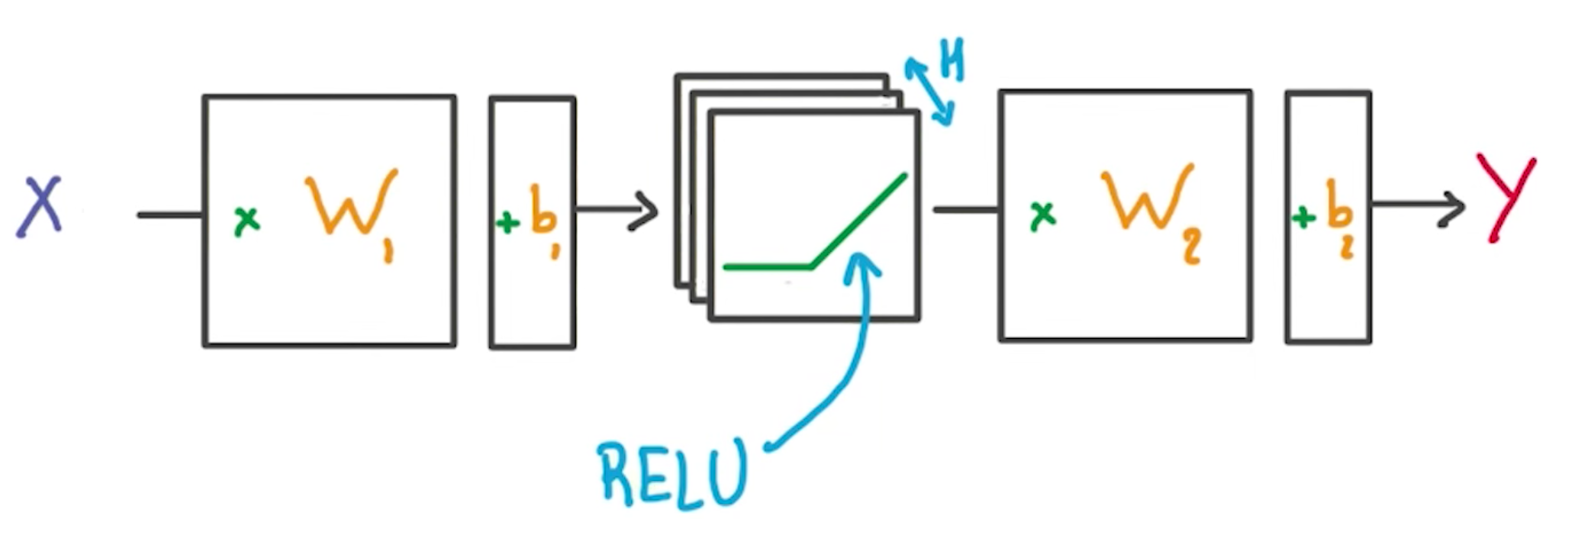
```
# Hidden layer with RELU activation
# ReLU作为隐藏层激活函数
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']),\
    biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
# 输出层的线性激活函数
logits = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])
```
你之前已经见过 tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])，也就是 xw + b。把线性函数与 ReLU 组合在一起，形成一个2层网络。

### 优化器 Optimizer
```
# Define loss and optimizer
# 定义误差值和优化器
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)
```

这跟 Intro to TensorFlow lab 里用到的优化技术一样。

### Session
```
# Initializing the variables
# 初始化变量
init = tf.global_variables_initializer()

# Launch the graph
# 启动图
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    # 训练循环
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        # 遍历所有 batch
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            # 运行优化器进行反向传导、计算 cost（获取 loss 值）
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
```
TensorFlow 中的 MNIST 库提供了分批接收数据的能力。调用mnist.train.next_batch()函数返回训练数据的一个子集。

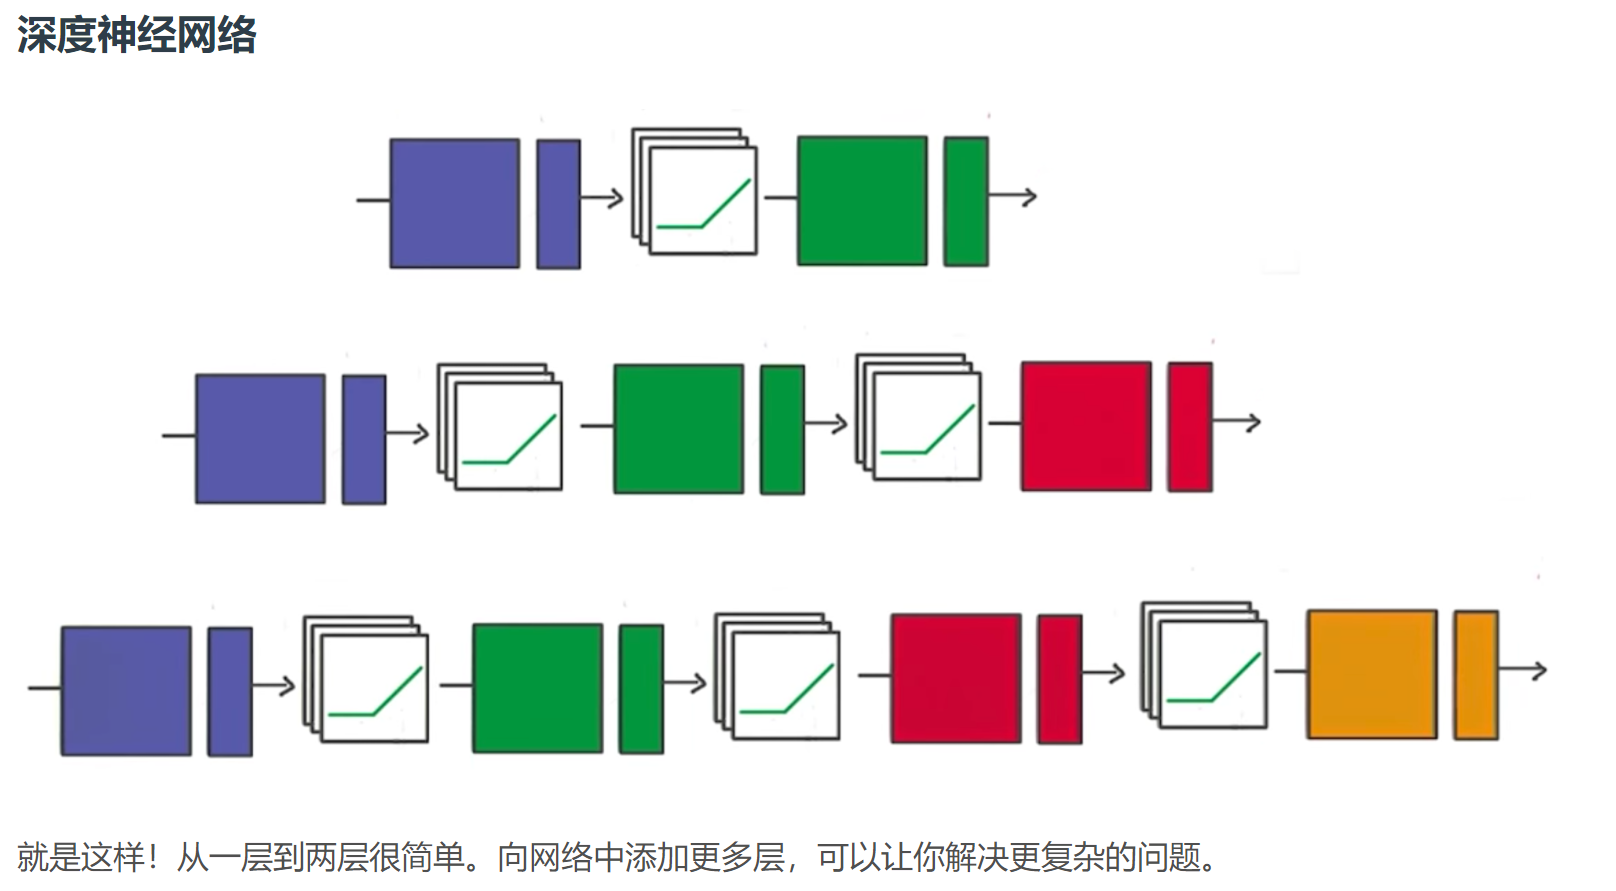